In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_test = pd.read_csv('../input/stroke-prediction/test_2v.csv')
data_train = pd.read_csv('../input/stroke-prediction/train_2v.csv')
data_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [3]:
data_train.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


so we have two columns with missing values only bmi and smoking status

In [5]:
data_train['bmi'] = data_train['bmi'].fillna(data_train['bmi'].mean())
data_test['bmi'] = data_test['bmi'].fillna(data_test['bmi'].mean())
data_train.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

In [6]:
#now left with the smoking status 
#first check how many people are  below 18 
data_train['smoking_status'][:10],data_train['age'][:10]

(0                NaN
 1       never smoked
 2                NaN
 3    formerly smoked
 4                NaN
 5                NaN
 6    formerly smoked
 7       never smoked
 8             smokes
 9       never smoked
 Name: smoking_status, dtype: object,
 0     3.0
 1    58.0
 2     8.0
 3    70.0
 4    14.0
 5    47.0
 6    52.0
 7    75.0
 8    32.0
 9    74.0
 Name: age, dtype: float64)

<AxesSubplot:>

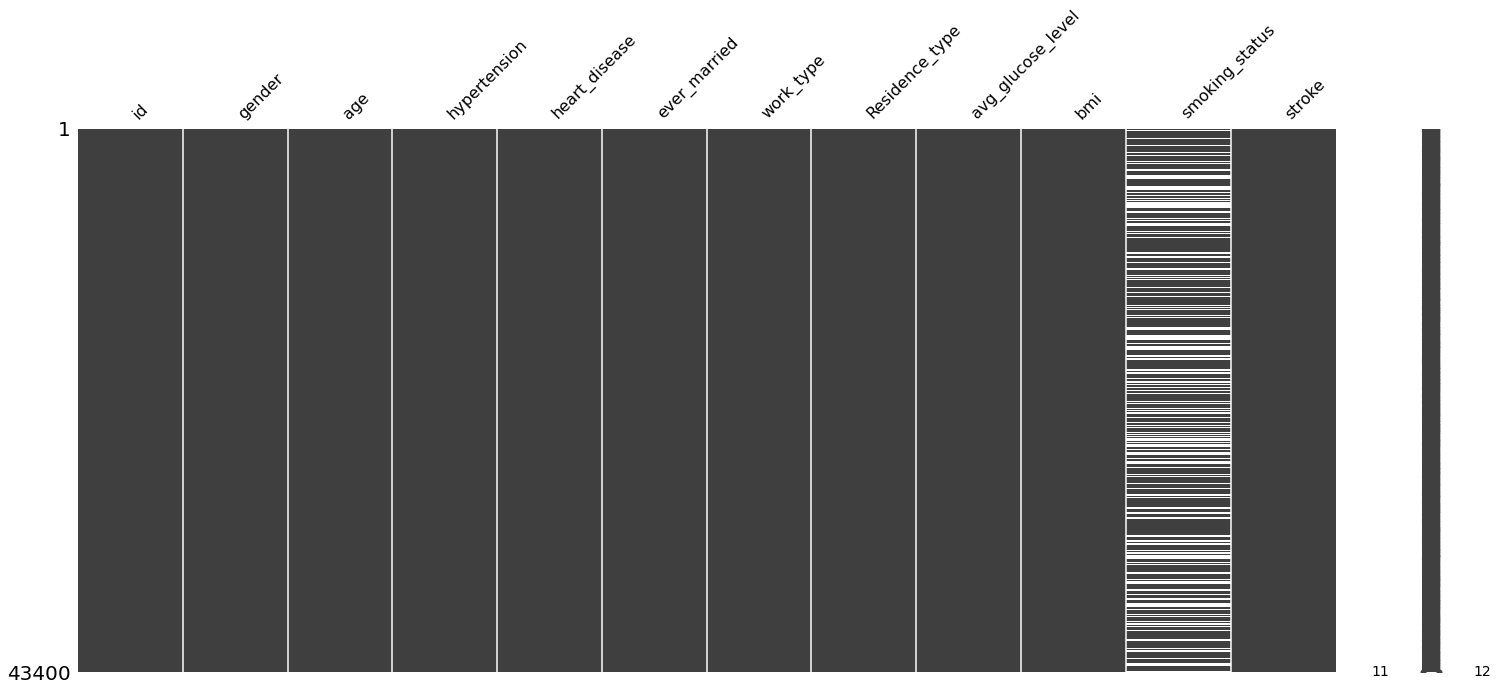

In [7]:
import missingno as ms 
ms.matrix(data_train)

In [8]:
data_trai = data_train.groupby(['age','smoking_status']).sum()
data_trai.head()


id  hypertension  heart_disease  avg_glucose_level  \
age  smoking_status                                                             
10.0 formerly smoked   677748             0              0            1648.38   
     never smoked     2459191             0              0            5648.49   
     smokes             64128             0              0              63.08   
11.0 formerly smoked   611500             0              0            1546.02   
     never smoked     3623926             0              0            8535.66   

                              bmi  stroke  
age  smoking_status                        
10.0 formerly smoked   326.505038       0  
     never smoked     1326.700000       0  
     smokes             20.500000       0  
11.0 formerly smoked   401.315115       0  
     never smoked     2148.715115       0

In [9]:
data_train = data_train.dropna(axis = 0, how = 'any')
data_test = data_test.dropna(axis = 0, how = 'any')
data_train.isnull().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
data_train['stroke'].value_counts()

0    29470
1      638
Name: stroke, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


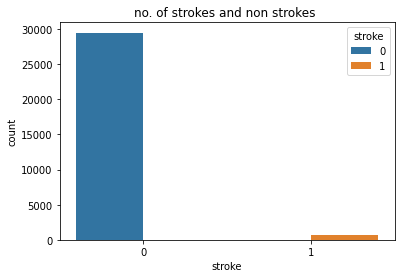

In [11]:


sns.countplot(data_train['stroke'],hue = data_train['stroke'])
plt.title("no. of strokes and non strokes ")
plt.show()


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


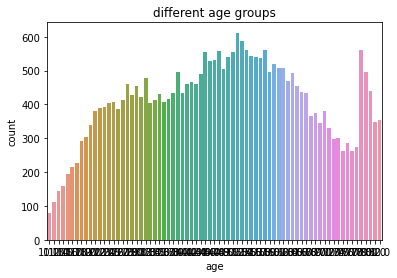

In [12]:
#plot age groups 
data_train['age'].value_counts()
sns.countplot(data_train['age'])
plt.title("different age groups")
plt.show()

In [13]:
#checking gender count
data_train['gender'].value_counts()

Female    18366
Male      11733
Other         9
Name: gender, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


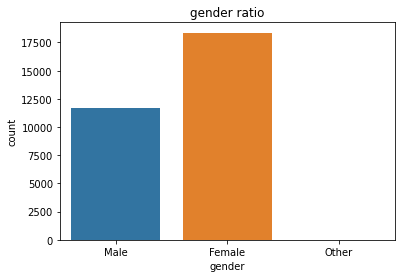

In [14]:
sns.countplot(data_train['gender'])
plt.title("gender ratio")
plt.show()

make plots with 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


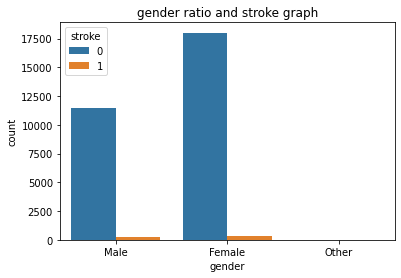

gender  stroke
Female  0         18006
        1           360
Male    0         11455
        1           278
Other   0             9
Name: stroke, dtype: int64

In [15]:
sns.countplot(data_train['gender'],hue = data_train['stroke'])
plt.title("gender ratio and stroke graph")
plt.show()
# as we see as compare to male, women have more number of strokes
data_train.groupby('gender')['stroke'].value_counts()

0    28430
1     1678
Name: heart_disease, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


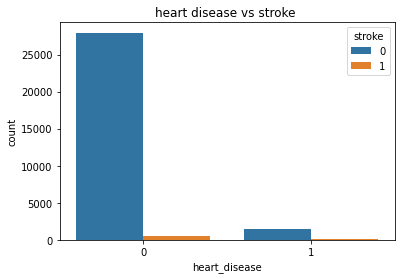

heart_disease  stroke
0              0         27934
               1           496
1              0          1536
               1           142
Name: stroke, dtype: int64


In [16]:
#checking how many people are suffering from heart disease
print(data_train['heart_disease'].value_counts())
#plotting it with stroke
sns.countplot(data_train['heart_disease'], hue = data_train['stroke'])
plt.title("heart disease vs stroke ")
plt.show()
print(data_train.groupby('heart_disease')['stroke'].value_counts())

#we can clearly see that the people which are having heart disease have high chances of stroke 

In [17]:
# checking hypertension 
data_train['hypertension'].value_counts()

0    26580
1     3528
Name: hypertension, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


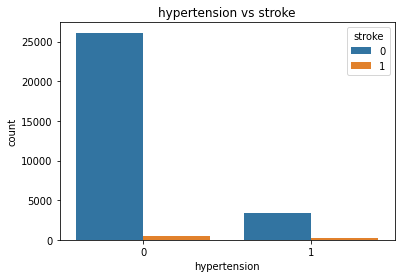

hypertension  stroke
0             0         26119
              1           461
1             0          3351
              1           177
Name: stroke, dtype: int64


In [18]:
#plotting hypertension and stroke
sns.countplot(data_train['hypertension'], hue = data_train['stroke'])
plt.title("hypertension vs stroke")
plt.show()
print(data_train.groupby('hypertension')['stroke'].value_counts())

#again the people having hypertention have high chances of strokes

In [19]:
#effect of worktype 
data_train['work_type'].value_counts()

Private          19585
Self-employed     5445
Govt_job          4346
children           631
Never_worked       101
Name: work_type, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


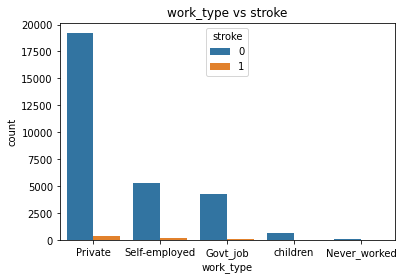

work_type      stroke
Govt_job       0          4274
               1            72
Never_worked   0           101
Private        0         19221
               1           364
Self-employed  0          5243
               1           202
children       0           631
Name: stroke, dtype: int64


In [20]:
sns.countplot(data_train['work_type'], hue = data_train['stroke'])
plt.title("work_type vs stroke")
plt.show()
print(data_train.groupby('work_type')['stroke'].value_counts())

# clearly see from the graph, people who never worked or do children job never faced any stroke, while self employed poeple have high chance of risk.

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


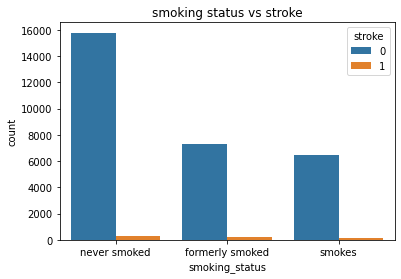

smoking_status   stroke
formerly smoked  0          7272
                 1           221
never smoked     0         15769
                 1           284
smokes           0          6429
                 1           133
Name: stroke, dtype: int64


In [21]:
# smoking is an important aspect 

print(data_train['smoking_status'].value_counts())
sns.countplot(data_train['smoking_status'], hue = data_train['stroke'])
plt.title("smoking status vs stroke")
plt.show()
print(data_train.groupby('smoking_status')['stroke'].value_counts())

#people who never smoked have very less chances of stroke as compare to others

In [22]:
# covert categorical data types 

str_data = data_train.select_dtypes(include =['object'])
str_data_test = data_test.select_dtypes(include =['object'])

int_data = data_train.select_dtypes(include =['int','float'])
int_data_test = data_test.select_dtypes(include =['int','float'])

#data_train = data_train.astype(data_train,'int64')

In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
#features = labelencoder.fit_transform(str_data)
features = str_data.apply(labelencoder.fit_transform)
features = features.join(int_data)
features.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,1,1,2,1,1,30468,58.0,1,0,87.96,39.2,0
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9,0
6,0,1,2,1,0,52800,52.0,0,0,77.59,17.7,0
7,0,1,3,0,1,41413,75.0,0,1,243.53,27.0,0
8,0,1,2,0,2,15266,32.0,0,0,77.67,32.3,0


In [24]:
labelencoder = LabelEncoder()
features_test = str_data_test.apply(labelencoder.fit_transform)
features_test = features_test.join(int_data_test)
features_test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,0,36306,80.0,0,0,83.84,21.1
1,0,1,3,0,0,61829,74.0,0,1,179.50,26.0
4,0,1,0,0,1,40801,63.0,0,0,83.57,27.6
5,0,1,2,1,1,9348,66.0,1,0,219.98,32.2
7,1,1,0,1,1,60512,46.0,0,0,120.80,32.5


In [25]:
#split it into target and feature
ytrain = features['stroke']
xtrain = features.drop(['stroke'],axis =1)
xtrain.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
1,1,1,2,1,1,30468,58.0,1,0,87.96,39.2
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9
6,0,1,2,1,0,52800,52.0,0,0,77.59,17.7
7,0,1,3,0,1,41413,75.0,0,1,243.53,27.0
8,0,1,2,0,2,15266,32.0,0,0,77.67,32.3


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xtrain,ytrain)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)


(22581, 11) (22581,) (7527, 11) (7527,)


In [27]:
y_test.head()

33374    0
8225     0
5935     0
35841    0
14463    0
Name: stroke, dtype: int64

applying different models 

naive bayes

In [28]:
from sklearn.naive_bayes import GaussianNB 

nb = GaussianNB()
model1 = nb.fit(x_train,y_train)
predict = nb.predict(x_test)
print(predict)
test_score= model1.score(x_test,y_test)
print("naive bayes test accuracy : ",test_score*100)


[0 0 0 ... 0 0 0]
naive bayes test accuracy :  97.24990035870866


In [29]:
# confusion matrix 
conf_mat = pd.crosstab(y_test,predict)
conf_mat

col_0,0,1
stroke,,
0,7312,49
1,158,8


In [30]:
#classification report for naive bayes 
from sklearn.metrics import classification_report
report =classification_report(y_test, predict)
print(report)


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7361
           1       0.14      0.05      0.07       166

    accuracy                           0.97      7527
   macro avg       0.56      0.52      0.53      7527
weighted avg       0.96      0.97      0.97      7527



decision tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc =  DecisionTreeClassifier(max_depth = 8)
model2 = dtc.fit(x_train,y_train)
predict = dtc.predict(x_test)
test_score = model2.score(x_test, y_test)
print("decision tree testing score is : ",test_score*100)

#classification report 
report2  = classification_report(y_test,predict)
print(report2)


decision tree testing score is :  97.48903945795138
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7361
           1       0.00      0.00      0.00       166

    accuracy                           0.97      7527
   macro avg       0.49      0.50      0.49      7527
weighted avg       0.96      0.97      0.97      7527



logistic regression classifier 

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model3 = logreg.fit(x_train,y_train)

predict = model3.predict(x_test)
print(predict)

modelscore = model3.score(x_test,y_test)
print('logistic regression model score is :' ,modelscore*100 )

# classification report

clfrep = classification_report(y_test, predict)
print(clfrep)

#conf matrix 
print("confusion matrix is ")
lrcon_mat = pd.crosstab(y_test, predict)
print(lrcon_mat)

[0 0 0 ... 0 0 0]
logistic regression model score is : 97.79460608476153
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7361
           1       0.00      0.00      0.00       166

    accuracy                           0.98      7527
   macro avg       0.49      0.50      0.49      7527
weighted avg       0.96      0.98      0.97      7527

confusion matrix is 
col_0      0
stroke      
0       7361
1        166


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


random forest classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model4 = rf.fit(x_train,y_train)

predict = model4.predict(x_test)
print(predict)

modelscore = model4.score(x_test,y_test)
print('random forest model score is :' ,modelscore*100 )

# classification report

rfcr = classification_report(y_test, predict)
print(rfcr)

#conf matrix 
print("confusion matrix is ")
rfcon_mat = pd.crosstab(y_test, predict)
print(rfcon_mat)

[0 0 0 ... 0 0 0]
random forest model score is : 97.79460608476153
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7361
           1       0.00      0.00      0.00       166

    accuracy                           0.98      7527
   macro avg       0.49      0.50      0.49      7527
weighted avg       0.96      0.98      0.97      7527

confusion matrix is 
col_0      0
stroke      
0       7361
1        166


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


checking cross validation score for each models 


In [34]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(model1,x_train,y_train,cv =20,scoring ='accuracy').mean()
print("naive bayes cross validation score is : " , val_score)

naive bayes cross validation score is :  0.9736505404579194


In [35]:
val_score = cross_val_score(model2,x_train,y_train,cv =20,scoring ='accuracy').mean()
print("decision tree cross validation score is : " , val_score)

decision tree cross validation score is :  0.9753776150873591


In [36]:
val_score = cross_val_score(model3,x_train,y_train,cv =10,scoring ='accuracy').mean()
print("logistic regression cross validation score is : " , val_score)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


logistic regression cross validation score is :  0.9790531996607605


In [37]:
val_score = cross_val_score(model4,x_train,y_train,cv =20,scoring ='accuracy').mean()
print("random forest cross validation score is : " , val_score)

random forest cross validation score is :  0.979097486224006


PCA analysis 


In [38]:
from sklearn.decomposition import PCA
pca =PCA(n_components =4)
principalcomponent = pca.fit_transform(xtrain)
xtrain.shape

(30108, 11)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(xtrain,ytrain)

#for naive bayes 

model1 = GaussianNB()
model1.fit(x_train,y_train)
predict1 = model1.predict(x_test)

score = model1.score(x_test,y_test)
print(score)

cross_val_score = cross_val_score(model1,xtrain,ytrain, cv = 10,scoring ='accuracy').mean()
print("cross val score = " , cross_val_score)

0.9736946990833001
cross val score =  0.9735950793932767


In [40]:
#for decision tree 
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)
predict2 = model2.predict(x_test)
score = model2.score(x_test,y_test)
print(score)

cross_val_score = cross_val_score(model2,xtrain,ytrain, cv = 10,scoring ='accuracy').mean()
print("cross val score = " , cross_val_score)

0.9554935565298259


TypeError: 'numpy.float64' object is not callable

In [ ]:
#for logistic regression
model3 = LogisticRegression()
model3.fit(x_train,y_train)
predict3 = model3.predict(x_test)
score = model3.score(x_test,y_test)
print(score)


In [ ]:
cross_val_score = cross_val_score(model3,xtrain,ytrain, cv = 10,scoring ='accuracy').mean()
print("cross val score = " , cross_val_score)

In [ ]:
#for random forest
model4 = RandomForestClassifier()
model4.fit(x_train,y_train)
predict4 = model4.predict(x_test)
score = model4.score(x_test,y_test)
print(score)
cross_val_score = cross_val_score(model4,xtrain,ytrain, cv = 20,scoring ='accuracy').mean()
print("cross val score = " , cross_val_score)